<a href="https://colab.research.google.com/github/juagarmar/NLP/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
import os
os.getcwd()

'/content'

In [4]:
df=pd.read_csv('/content/train.csv', encoding='unicode_escape')

In [5]:
df

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940,227540.0,137
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60,Greece,10423054,128900.0,81
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523,340.0,331
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568,107160.0,167


In [6]:
df_simple=df[['text', 'sentiment']]

In [7]:
df_simple

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...
27476,wish we could come see u on Denver husband l...,negative
27477,I`ve wondered about rake to. The client has ...,negative
27478,Yay good for both of you. Enjoy the break - y...,positive
27479,But it was worth it ****.,positive


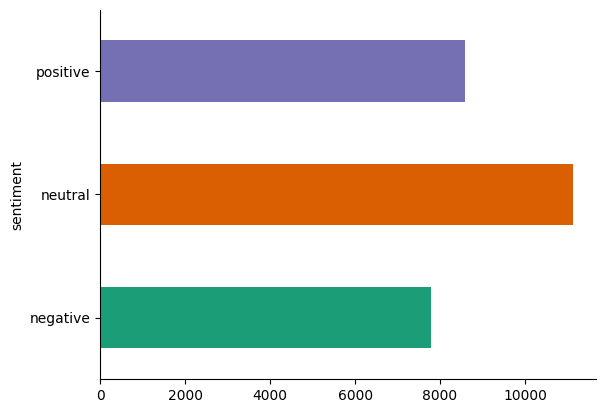

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
df_simple.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
# Define the function to remove "@" mentions from a string
def remove_mention(text):
    # Check if the text is a string
    if isinstance(text, str):
        # Split the text into words and filter out any word that starts with '@'
        msg = [word for word in text.split() if not word.startswith('@')]
        # Join the filtered words back into a single string
        return ' '.join(msg)
    else:
        # If the text is not a string, return it as is or handle it as you see fit
        return text  # or return '' or return 'placeholder'


# Apply the function to the 'text' column in the DataFrame
df_simple['text'] = df_simple['text'].apply(remove_mention)
print(df_simple)

                                                    text sentiment
0                    I`d have responded, if I were going   neutral
1          Sooo SAD I will miss you here in San Diego!!!  negative
2                              my boss is bullying me...  negative
3                         what interview! leave me alone  negative
4      Sons of ****, why couldn`t they put them on th...  negative
...                                                  ...       ...
27476  wish we could come see u on Denver husband los...  negative
27477  I`ve wondered about rake to. The client has ma...  negative
27478  Yay good for both of you. Enjoy the break - yo...  positive
27479                          But it was worth it ****.  positive
27480  All this flirting going on - The ATG smiles. Y...   neutral

[27481 rows x 2 columns]


<ipython-input-9-99bcf48138ea>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simple['text'] = df_simple['text'].apply(remove_mention)


In [10]:
# Characters
import re
def remove_unnecessary_characters(text):
    text = re.sub(r'<.*?>', '', str(text))
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))
    text = re.sub(r'\s+', ' ', str(text)).strip()
    return text
df_simple['text'] = df_simple['text'].apply(remove_unnecessary_characters)

<ipython-input-10-c0b03faceb33>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simple['text'] = df_simple['text'].apply(remove_unnecessary_characters)


In [11]:
df_simple

,text,sentiment
0,Id have responded if I were going,neutral
1,Sooo SAD I will miss you here in San Diego,negative
2,my boss is bullying me,negative
3,what interview leave me alone,negative
4,Sons of why couldnt they put them on the relea...,negative
...,...,...
27476,wish we could come see u on Denver husband los...,negative
27477,Ive wondered about rake to The client has made...,negative
27478,Yay good for both of you Enjoy the break you p...,positive
27479,But it was worth it,positive


In [13]:
maxlen=300
training_samples=0
validation_samples=0
max_words=300

In [12]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer

# Define the maximum number of words to keep
max_words = 300

# Initialize the tokenizer with a max number of words
tokenizer = Tokenizer(num_words=max_words)

# Fit the tokenizer on the texts
tokenizer.fit_on_texts(df_simple['text'])

# Convert text to sequences of integers
sequences = tokenizer.texts_to_sequences(df_simple['text'])

# Output the results to see the tokenized sequences
print(sequences)

[[289, 16, 68, 1, 119, 45], [114, 1, 58, 88, 7, 87, 10], [5, 9, 15], [56, 15], [12, 109, 85, 126, 14, 3, 62, 202], [67, 11, 3, 155, 14], [11, 3, 296, 35, 101, 79, 111, 9, 28, 6], [], [12, 7], [246, 55, 20, 9, 18], [76, 83, 76, 1, 42, 2, 24, 1, 3, 35, 13, 165, 123, 34, 5, 6], [1, 57, 57, 36, 3, 285, 42, 121], [5, 9, 14], [1, 74, 2, 38, 2, 117, 19, 1, 299, 5], [49, 3], [82, 1, 64], [214, 2, 76, 62], [135, 99, 193, 11, 3, 149, 6, 5, 233, 68, 1, 116, 16, 4, 14, 8, 105, 184], [9, 59, 73, 31, 123, 88, 51], [278, 20, 26, 18, 227, 7], [82, 13, 17, 113, 1, 92, 7, 213, 98, 163, 132, 132], [9, 57, 3, 70, 35, 6, 11, 265, 48, 148, 2, 16, 4], [9, 3, 209, 11, 98, 174, 9, 274, 46], [5, 1, 228, 27, 2, 89, 2, 3], [65, 1, 23, 220], [3, 14, 5, 9, 101, 13], [13, 113], [14, 3, 134, 2, 2], [49, 248, 23, 101, 32, 63, 280, 99, 32, 63, 10, 4], [221, 2, 133, 6, 63, 9, 4, 10, 59, 33, 26, 169, 44], [13, 45, 73, 31, 16, 7, 5, 70, 106], [1, 92, 58, 120, 3], [68, 8, 9, 171, 1, 47, 5, 8, 1, 64, 69, 17, 83, 11, 166, 11

In [13]:
x=sequences
y=df_simple['sentiment']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_length = 256
vocab_size = 10000
# Build the model
model = Sequential([
    Embedding(vocab_size, 16, input_length=max_length),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    #Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 16)           160000    
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160289 (626.13 KB)
Trainable params: 160289 (626.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
y_train

1029     positive
11208    positive
20041    negative
7048     negative
5459     negative
           ...   
21575    positive
5390      neutral
860       neutral
15795    negative
23654    negative
Name: sentiment, Length: 18412, dtype: object

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define the maximum length of sequences. You might choose this based on the length distribution of your data.
max_length = 256

# Pad sequences in your training and testing data
x_train_i = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test_i = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')
y_train = y_train.map({'positive': 1, 'negative': 0, 'neutral': 2})
y_test = y_test.map({'positive': 1, 'negative': 0, 'neutral': 2})
y_train_i = np.array(y_train, dtype=np.int32)
y_test_i = np.array(y_test, dtype=np.int32)

In [19]:
# Train the model
epochs = 10
history = model.fit(x_train_i, y_train_i,
                    epochs=epochs,
                    validation_data=(x_test_i, y_test_i),
                    verbose=2)


Epoch 1/10
576/576 - 10s - loss: -1.0197e+00 - accuracy: 0.3135 - val_loss: -4.3846e+00 - val_accuracy: 0.3086 - 10s/epoch - 17ms/step
Epoch 2/10
576/576 - 2s - loss: -1.4078e+01 - accuracy: 0.3141 - val_loss: -3.0857e+01 - val_accuracy: 0.3086 - 2s/epoch - 4ms/step
Epoch 3/10
576/576 - 4s - loss: -5.5459e+01 - accuracy: 0.3141 - val_loss: -9.3985e+01 - val_accuracy: 0.3086 - 4s/epoch - 7ms/step
Epoch 4/10
576/576 - 3s - loss: -1.3287e+02 - accuracy: 0.3141 - val_loss: -1.9667e+02 - val_accuracy: 0.3086 - 3s/epoch - 5ms/step
Epoch 5/10
576/576 - 2s - loss: -2.5284e+02 - accuracy: 0.3141 - val_loss: -3.5002e+02 - val_accuracy: 0.3086 - 2s/epoch - 4ms/step
Epoch 6/10
576/576 - 2s - loss: -4.2157e+02 - accuracy: 0.3141 - val_loss: -5.5533e+02 - val_accuracy: 0.3086 - 2s/epoch - 4ms/step
Epoch 7/10
576/576 - 3s - loss: -6.3633e+02 - accuracy: 0.3141 - val_loss: -8.1045e+02 - val_accuracy: 0.3086 - 3s/epoch - 4ms/step
Epoch 8/10
576/576 - 4s - loss: -9.0393e+02 - accuracy: 0.3141 - val_loss

In [37]:
x, y = df_simple.text, df_simple.sentiment
#STop words
import nltk
# Load stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')


# transformar em bag of words

from sklearn.feature_extraction.text import CountVectorizer

# Set up the vectorizer
vec = CountVectorizer(ngram_range=(1,1), binary=True, max_features=300, stop_words=stopwords)

# Fit and transform the text data to a dense format
x = vec.fit_transform(df_simple['text']).toarray()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
x.shape

(27481, 300)

In [41]:
y.shape

(27481,)

In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

In [42]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

# transformar em bag of words

from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(ngram_range=(1,1),
                      binary=True,
                      max_features=300,
                      stop_words=stopwords)
x = vec.fit_transform(x)
x

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


NameError: name 'x' is not defined

In [ ]:
def remove_unnecessary_characters(text):
    text = re.sub(r'<.*?>', '', str(text))
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))
    text = re.sub(r'\s+', ' ', str(text)).strip()
    return text
df['clean_text'] = df['text'].apply(remove_unnecessary_characters)